# Basic Settings

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.style.use("seaborn")
mpl.rcParams["figure.dpi"] = 200

# If you use Mac OS Catalina and Conda environment you can face a problem of kernel interuption with an error:
# Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized
# To ignore this you can set `KMP_DUPLICATE_LIB_OK` to True, but it is not the best oslution.

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [2]:
import gym
import stable_baselines3 as sb_models
from tf_agents import agents as tf_agents_models
import kindo

# Training Models

### Define models with default arguments

You can just put model classes in a single list and pass them to training function.

In [3]:
models = [tf_agents_models.DqnAgent, tf_agents_models.PPOAgent, sb_models.DQN, sb_models.PPO, sb_models.A2C]
model_names = ["tf_dqn", "tf_ppo", "sb_dqn", "sb_ppo", "sb_a2c"]

Train all the models calling `train_multiple` function

In [4]:
kindo.train_multiple(models, gym.make("CartPole-v0"), 1700, 195, model_names, 200)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


INFO:tensorflow:Assets written to: saved/CartPoleEnv/tf_dqn/model/assets


INFO:tensorflow:Assets written to: saved/CartPoleEnv/tf_dqn/model/assets


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=True)` instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=True)` instead.


INFO:tensorflow:Assets written to: saved/CartPoleEnv/tf_ppo/model/assets


INFO:tensorflow:Assets written to: saved/CartPoleEnv/tf_ppo/model/assets


### Define custom models

You can also set up models and adjust hyperparameters, network type, etc

In [5]:
# Initializing stable-baselines models:
import tensorflow as tf
from tf_agents.agents.dqn import dqn_agent
from tf_agents.networks import q_network
from tf_agents.utils import common

sb_dqn = sb_models.DQN(
    policy="MlpPolicy", env=gym.make("CartPole-v0"), learning_rate=1e-3, verbose=0
)
sb_ppo = sb_models.PPO(policy="MlpPolicy", env=gym.make("CartPole-v0"), verbose=0)
sb_a2c = sb_models.A2C(policy="MlpPolicy", env=gym.make("CartPole-v0"), verbose=0)

# Initializing tf_agents:
env = gym.make("CartPole-v0")
train_env = kindo.environment_converter.gym_to_tf(env)
fc_layer_params = (100,)
q_net = q_network.QNetwork(
    input_tensor_spec=train_env.observation_spec(),
    action_spec=train_env.action_spec(),
    fc_layer_params=fc_layer_params,
)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=1e-3)
train_step_counter = tf.Variable(0)
tf_agent_dqn = dqn_agent.DqnAgent(
    time_step_spec=train_env.time_step_spec(),
    action_spec=train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter,
)
tf_agent_dqn.initialize()

models = [sb_dqn, sb_ppo, sb_a2c, tf_agent_dqn]
model_names = ["sb_dqn", "sb_ppo", "sb_a2c", "tf_a_dqn"]

And train them the same way as model classes

In [6]:
kindo.train_multiple(models, gym.make("CartPole-v0"), 15000, model_names=model_names, maximum_episode_reward=200, stop_threshold=190)

# Observe training history

If you trained different environments, there is way to check all the environments which were trained:
The structure of saved files is:

```
saved/ 
    EnvName1/
        /Model1
        /model2
    ...
```

In [7]:
kindo.paths.get_saved_environments()

['CartPoleEnv']

In [8]:
history_manager = kindo.HistoryManager("CartPoleEnv")

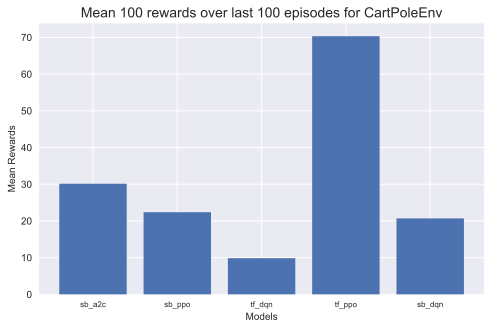

In [9]:
history_manager.plot_mean_rewards()

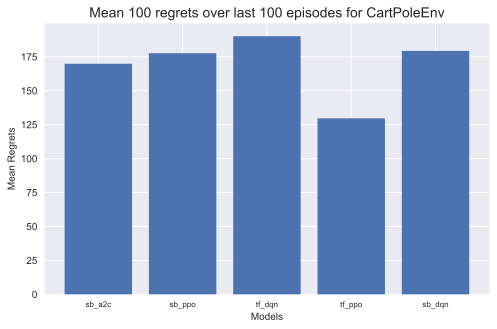

In [10]:
history_manager.plot_mean_regrets()

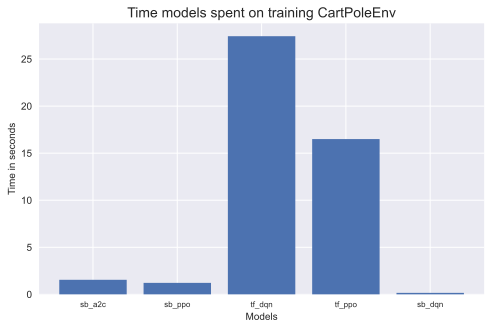

In [11]:
history_manager.plot_time_spent_on_training()

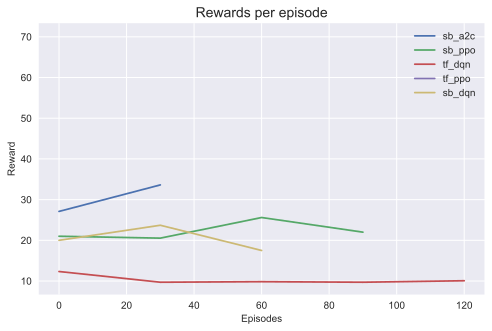

In [12]:
history_manager.plot_episode_rewards()

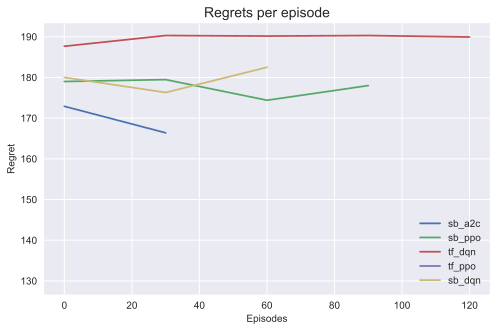

In [13]:
history_manager.plot_episode_regrets()